# Trend Analysis of Causes of Mortality

# Data Processing

Load json to view detailed description of data

In [ ]:
import json
import pandas as pd

In [ ]:
f = open("2005_codes.json",encoding='utf-8')
json2005=json.load(f)

Select useful columns

In [ ]:
data = None
for i in range(2005,2016):
    d1 = pd.read_csv("%d_data.csv" %i,usecols=[4,16,23,24,25,26,27])
    data = pd.concat([data, d1],axis=0).reset_index(drop = True)

In [ ]:
data.columns

Index(['month_of_death', 'current_data_year', 'icd_code_10th_revision',
       '358_cause_recode', '113_cause_recode', '130_infant_cause_recode',
       '39_cause_recode', 'icd_code_10'],
      dtype='object')

Count data in each column to make sure there is no lack.

In [ ]:
data.groupby('current_data_year').count()

,month_of_death,icd_code_10th_revision,358_cause_recode,113_cause_recode,130_infant_cause_recode,39_cause_recode,icd_code_10
current_data_year,,,,,,,
2005,2452506,2452506,2452506,2452506,28503,2452506,0
2006,2430725,2430725,2430725,2430725,28592,2430725,0
2007,2428343,2428343,2428343,2428343,29225,2428343,0
2008,2476811,2476811,2476811,2476811,28152,2476811,0
2009,2441219,2441219,2441219,2441219,26480,2441219,0
2010,2472542,2472542,2472542,2472542,24638,2472542,0
2011,2519842,2519842,2519842,2519842,24054,2519842,0
2012,2547864,0,2547864,2547864,23710,2547864,2547864
2013,2601452,2601452,2601452,2601452,23497,2601452,0


In [ ]:
data['39_cause_recode'].unique()

array([15, 28, 24, 16,  8, 36,  6, 37, 39, 42, 21, 40,  5, 31, 22, 27, 17,
        7,  9, 26, 34, 30, 10, 23, 11, 13, 33, 20, 41, 38,  1, 14,  3, 12,
       25, 29, 35, 32,  2], dtype=int64)

In [ ]:
# 2012 icd_code_10th_revision lack data, update the data for 2012
data.loc[data['current_data_year']==2012,'icd_code_10th_revision'] = data.loc[data['current_data_year']==2012,'icd_code_10']
data.loc[data['current_data_year']==2012,'icd_code_10th_revision']

17221988    C349
17221989     F03
17221990    K754
17221991     N19
17221992    M259
            ... 
19769847    B238
19769848    E142
19769849    C349
19769850     X37
19769851     X91
Name: icd_code_10th_revision, Length: 2547864, dtype: object

Since we only want to analyze the trends of causes, we don't need too many detailed causes. Therefore, we select 39_cause_recode column, and drop other causes columns.

We add a month column with year and month information and sum the number of deaths at different time levels.

In [ ]:
# add 'month' col
month = []
for i in range(len(data)):
    month.append(str(data.loc[i,'current_data_year'])+'-'+str(data.loc[i,'month_of_death']).zfill(2))
data['month'] = month
data.head()

,month_of_death,current_data_year,icd_code_10th_revision,358_cause_recode,113_cause_recode,130_infant_cause_recode,39_cause_recode,icd_code_10,month
0,1,2005,C439,98,28,NaN,15,NaN,2005-01
1,1,2005,J439,266,84,NaN,28,NaN,2005-01
2,1,2005,I698,239,70,NaN,24,NaN,2005-01
3,1,2005,E119,159,46,NaN,16,NaN,2005-01
4,1,2005,C349,93,27,NaN,8,NaN,2005-01


In [ ]:
# year group by data
data_39_cause=data.drop(axis=1,columns=['358_cause_recode','113_cause_recode','130_infant_cause_recode','icd_code_10','month','month_of_death','icd_code_10th_revision'], inplace=False)
data_39_cause=data_39_cause.groupby([data['current_data_year'],data['39_cause_recode']]).count()
data_39_cause.rename(columns = {'39_cause_recode':'cnt'},inplace=True)
data_39_cause.drop(axis=1,columns=['current_data_year'], inplace=True)
data_39_cause.reset_index(inplace=True)
data_39_cause.head()

,current_data_year,39_cause_recode,cnt
0,2005,1,653
1,2005,2,47
2,2005,3,12597
3,2005,5,11545
4,2005,6,53315


In [ ]:
# year+month group by data
data_39_cause_month=data.drop(axis=1,columns=['358_cause_recode','113_cause_recode','130_infant_cause_recode','icd_code_10','current_data_year','month_of_death','icd_code_10th_revision'], inplace=False)
data_39_cause_month=data_39_cause_month.groupby([data['month'],data['39_cause_recode']]).count()
data_39_cause_month.rename(columns = {'39_cause_recode':'cnt'},inplace=True)
data_39_cause_month.drop(axis=1,columns=['month'], inplace=True)
data_39_cause_month.reset_index(inplace=True)
data_39_cause_month.head()

,month,39_cause_recode,cnt
0,2005-01,1,53
1,2005-01,2,4
2,2005-01,3,1103
3,2005-01,5,1037
4,2005-01,6,4662


In [ ]:
# convert to time data, add description
data_cause_v2 = data_39_cause[data_39_cause['current_data_year']==2005][['39_cause_recode','cnt']]
data_cause_v2.rename(columns = {'cnt':str(2005)},inplace=True)
data_cause_v2

for i in range(2006,2016):
    df = data_39_cause[data_39_cause['current_data_year']==i][['39_cause_recode','cnt']]
    df.rename(columns = {'cnt':str(i)},inplace=True)
    data_cause_v2 = pd.merge(data_cause_v2, df, how='left', left_on='39_cause_recode',right_on='39_cause_recode')

description = []
for i in data_cause_v2['39_cause_recode']:
    description.append(json2005['39_cause_recode'][str(i).zfill(3)])
data_cause_v2['description'] = description

data_cause_v2.head()

,39_cause_recode,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,description
0,1,653,658,561,585,537,575,543,519,561,498,479,Tuberculosis (A16-A19)
1,2,47,38,42,34,34,28,45,37,49,43,45,Syphilis (A50-A53)
2,3,12597,12165,11332,10345,9444,8406,7721,7246,6999,6755,6503,Human immunodeficiency virus (HIV) disease (B2...
3,5,11545,11365,11407,11384,11208,11415,11058,11209,11280,11337,11361,Malignant neoplasm of stomach (C16)
4,6,53315,53605,53648,53383,52444,52677,52342,52078,52305,52301,53249,"Malignant neoplasms of colon, rectum and anus ..."


In [ ]:
data_cause_month = data_39_cause_month[data_39_cause_month['month']=='2005-01'][['39_cause_recode','cnt']]
data_cause_month.rename(columns = {'cnt':'2005-01'},inplace=True)
data_cause_month

for i in data_39_cause_month['month'].unique():
    if i != '2005-01':
        df = data_39_cause_month[data_39_cause_month['month']==i][['39_cause_recode','cnt']]
        df.rename(columns = {'cnt':i},inplace=True)
        data_cause_month = pd.merge(data_cause_month, df, how='left', left_on='39_cause_recode',right_on='39_cause_recode')

description = []
for i in data_cause_month['39_cause_recode']:
    description.append(json2005['39_cause_recode'][str(i).zfill(3)])
data_cause_month['description'] = description

data_cause_month.head()

,39_cause_recode,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,...,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,description
0,1,53,55,66,59,60,50,44,61,60,...,33,42,40,44,37,33,38,41,44,Tuberculosis (A16-A19)
1,2,4,5,6,3,7,3,3,1,5,...,2,2,4,4,4,4,3,6,3,Syphilis (A50-A53)
2,3,1103,1094,1116,1059,1043,964,1013,1037,990,...,525,544,522,555,495,556,507,492,514,Human immunodeficiency virus (HIV) disease (B2...
3,5,1037,907,959,939,968,967,1001,955,857,...,941,993,920,951,966,961,954,973,923,Malignant neoplasm of stomach (C16)
4,6,4662,4135,4676,4341,4379,4389,4456,4558,4359,...,4345,4494,4186,4577,4520,4319,4494,4404,4618,"Malignant neoplasms of colon, rectum and anus ..."


Since top 10 causes account for 74.12% of total causes, and top 3 causes account for 54.59% of total causes, we will focus on top 10 causes.

In [ ]:
sum(data_cause_v2['2015'].sort_values(ascending=False).head(10))/sum(data_cause_v2['2015'])

0.7411513068584408

In [ ]:
sum(data_cause_v2['2015'].sort_values(ascending=False).head(3))/sum(data_cause_v2['2015'].sort_values(ascending=False).head(10))

0.5459049854164308

Save processed data to csv files.

Use flourish to visualize how number of death for top 10 causes changes from 2005 to 2015(https://preview.flourish.studio/4142500/gLv-s1qFMq8FlqOS99WgAB-ID7mkw8rhKaWaKddRN-vHEvNbsEu3qE7lk0-RfQZ2/) and number of death for top 10 causes from 2005 to 2015, each month(https://public.flourish.studio/visualisation/4158887/)

In [ ]:
data_cause_v2.to_csv('data_cause_v2.csv',index=False)

In [ ]:
data_cause_month.to_csv('data_cause_month.csv',index=False)

# __Month and Season Trend Analysis__

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.ticker as ticker
import seaborn as sns

from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

%matplotlib inline

1. Load Data

Load the preprocessed data, create a new row with code 43, which contains the sum of the monthly deaths from all causes

Sort data, select top 10 causes and the total sum.

In [ ]:
dcm_all = pd.read_csv("data_cause_month.csv")
dcm=dcm_all.drop(axis=1,columns=["description"], inplace=False)
dcm.loc[39,:] = dcm.sum()
dcm.loc[39,'39_cause_recode'] = 43
#43 means the sum of all causes
dcm.sort_values(by='2015-12',ascending=False, inplace=True)
dcm = dcm.head(11) #select 11 becuase cause 43 is the sum
dcm.head()

,39_cause_recode,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,...,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12
39,43.0,226822.0,213660.0,231486.0,205188.0,201211.0,187732.0,191821.0,191183.0,185855.0,...,243174.0,224841.0,224035.0,211631.0,217451.0,214917.0,210347.0,223987.0,220234.0,234228.0
33,37.0,34433.0,32736.0,35902.0,31412.0,29746.0,27375.0,28255.0,28315.0,27539.0,...,46850.0,42326.0,41308.0,38813.0,39705.0,39859.0,39148.0,41749.0,41419.0,44329.0
17,21.0,43284.0,40274.0,43049.0,37353.0,36845.0,33656.0,34112.0,33519.0,32743.0,...,33425.0,30660.0,30232.0,28175.0,29086.0,28342.0,27549.0,29648.0,29663.0,32037.0
18,22.0,16531.0,15557.0,16977.0,14689.0,14325.0,13431.0,13223.0,12801.0,12915.0,...,20178.0,18626.0,18300.0,16999.0,17620.0,17024.0,16835.0,17868.0,17826.0,19091.0
13,15.0,11896.0,10874.0,11744.0,11191.0,11353.0,11169.0,11460.0,11743.0,11293.0,...,14134.0,13241.0,13490.0,13183.0,13624.0,13614.0,13512.0,14079.0,13352.0,13951.0


2. Select Suitable Model to Analyze Trends

Draw histograms of these causes. Their distributions are similar to the normal distribution, so I use linear regression to analyze whether the number of deaths is related to time.

C:\Users\rufen\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


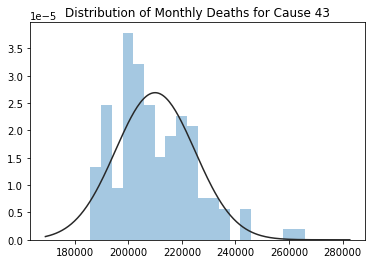

C:\Users\rufen\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


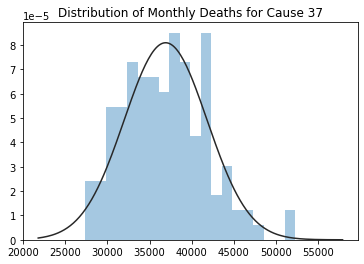

C:\Users\rufen\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


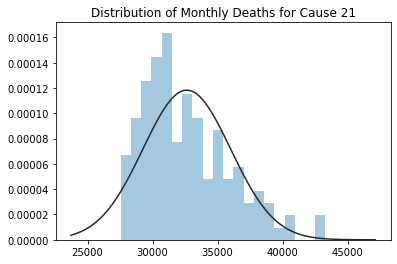

C:\Users\rufen\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


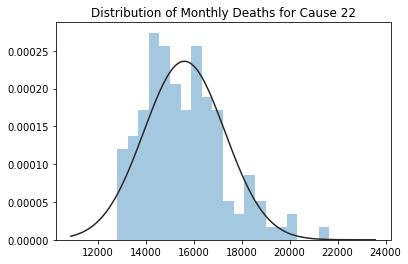

C:\Users\rufen\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


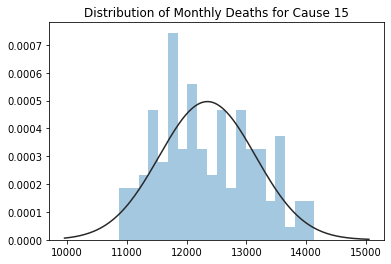

C:\Users\rufen\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


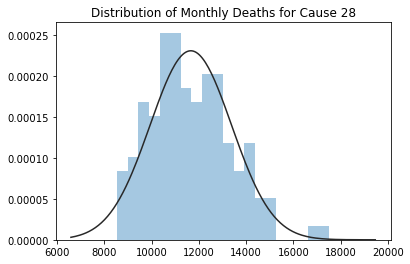

C:\Users\rufen\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


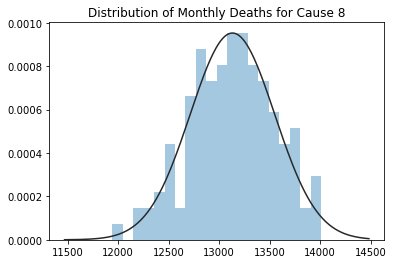

C:\Users\rufen\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


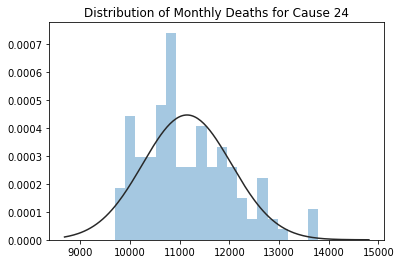

C:\Users\rufen\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


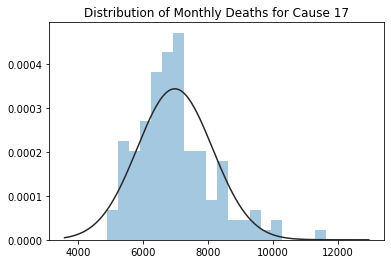

C:\Users\rufen\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


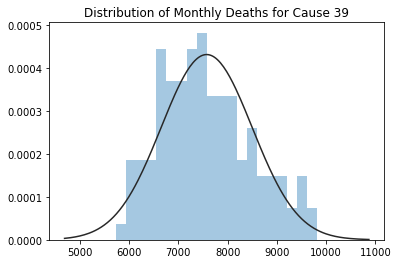

C:\Users\rufen\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


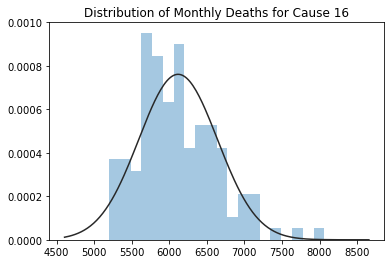

In [ ]:
for i in dcm["39_cause_recode"]:
    #create a dataframe with time series data
    cause_data = dcm[dcm["39_cause_recode"] == i]
    cause_data.drop(columns=["39_cause_recode"],axis=1,inplace=True)
    value = cause_data.values.tolist()[0]
    Y = pd.DataFrame(value).fillna(0)
    his = sns.distplot(Y,bins=20,fit=stats.norm,kde=False)
    #Fit with normal distribution parameters
    plt.title('Distribution of Monthly Deaths for Cause %i'%i)
    plt.show()
    his.get_figure().savefig('His_cause%i'%i,dpi=400)

3. Analyze Monthly Trend

Since I want to see significance, I use sm.OLS to fit the model. 

First analyze possible significant increasing or decreasing trends.

In [ ]:
#build a dataframe to contain coefficients, intercept, and R2 of each cause
lr_df_t = pd.DataFrame(columns=['index','39_cause_recode', 'coefficients_year', 'intercept', 'R2'])
lr_df_t['index'] = dcm['39_cause_recode']
lr_df_t = lr_df_t.set_index(['index'],drop = True)

In [ ]:
# define reg&graph functions
def trend(data,cause):
    
    lr_df_t.loc[cause,'39_cause_recode'] = cause
    # add information to lr_df_t
    
    cause_data = data[data["39_cause_recode"] == cause]
    cause_data = cause_data.drop(axis=1,columns=["39_cause_recode"], inplace=False)
    column = cause_data.columns.values.tolist()
    value = cause_data.values.tolist()[0]
    
    new_month = list(range(len(column)))
    new_month_array = np.array(new_month,'float32')
    values = np.array(value,'float32')
    X = sm.add_constant(new_month_array)
    model = sm.OLS(values, X).fit()
    print(model.summary())
    
    lr_df_t.loc[cause,'coefficients_year'] = model.params[1]
    lr_df_t.loc[cause,'intercept'] = model.params[0]
    lr_df_t.loc[cause,'R2'] = model.rsquared
    # add information to lr_df_t

    month_new = []
    for i in range(0,len(column),6):
        month_new.append(column[i])
    
    predicted = model.predict(X.astype(float))
    plt.figure(figsize=[20, 7.5])
    time = plt.scatter(column, values, marker='o',color='steelblue',s=50)   
    plt.plot(column, predicted,color='sandybrown',linewidth=3)
    plt.title('Cause %d: Number of Deaths per Month from 2005 to 2015'%cause, fontsize=20)
    plt.ylabel('Number of Deaths', fontsize=16)
    plt.xlabel('Month', fontsize=16)
    plt.xticks(list(range(0,len(month),6)), month_new)
    time.get_figure().savefig('time_cause%i'%cause,dpi=400)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     30.64
Date:                Wed, 16 Dec 2020   Prob (F-statistic):           1.65e-07
Time:                        08:19:18   Log-Likelihood:                -1441.1
No. Observations:                 132   AIC:                             2886.
Df Residuals:                     130   BIC:                             2892.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.989e+05   2326.895     85.467      0.0



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     17.60
Date:                Wed, 16 Dec 2020   Prob (F-statistic):           5.00e-05
Time:                        08:19:24   Log-Likelihood:                -1162.8
No. Observations:                 132   AIC:                             2330.
Df Residuals:                     130   BIC:                             2335.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.063e+04    282.506     37.636      0



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     9.245
Date:                Wed, 16 Dec 2020   Prob (F-statistic):            0.00286
Time:                        08:19:30   Log-Likelihood:                -1009.3
No. Observations:                 132   AIC:                             2023.
Df Residuals:                     130   BIC:                             2028.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5885.9110     88.291     66.665      0

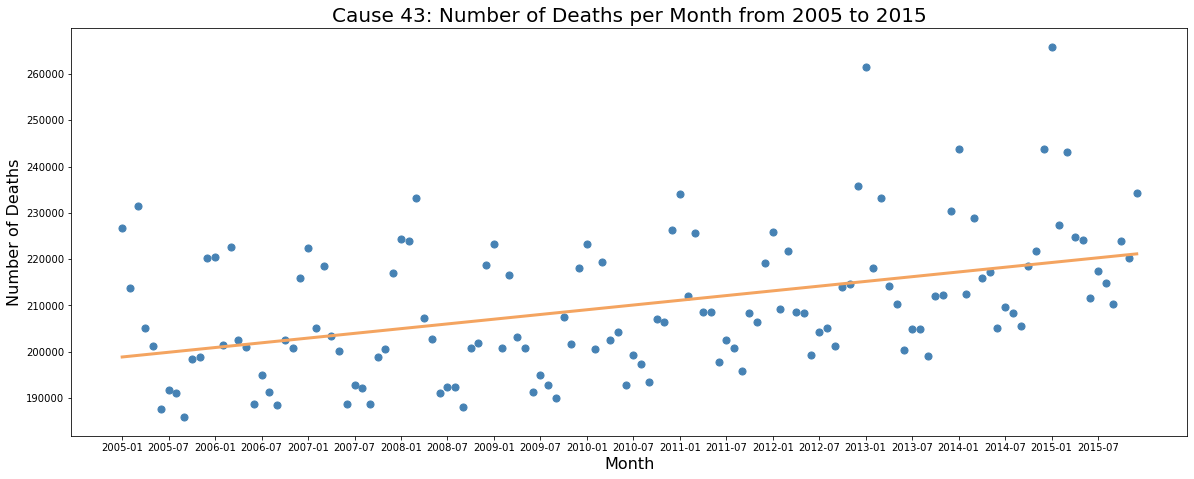

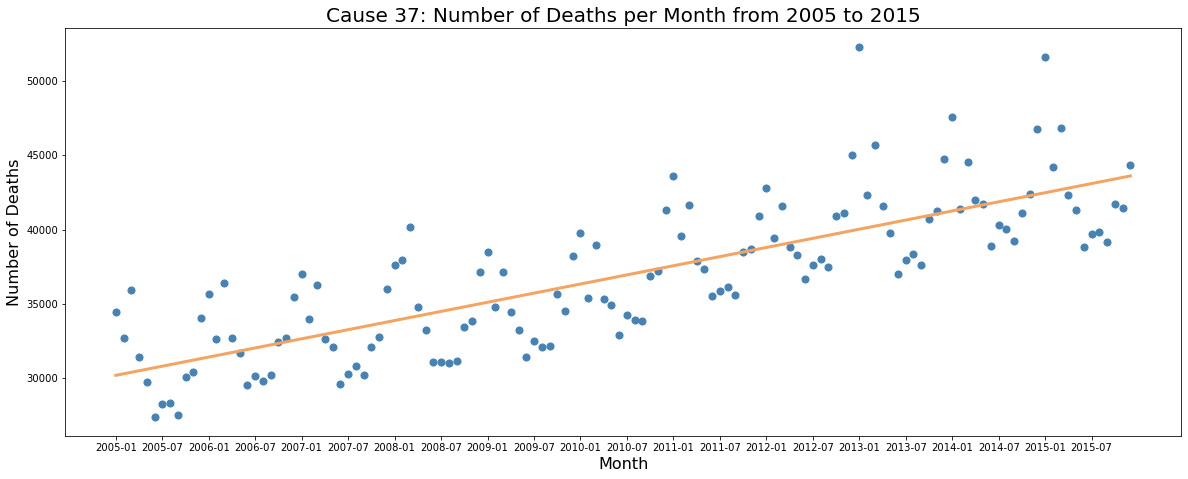

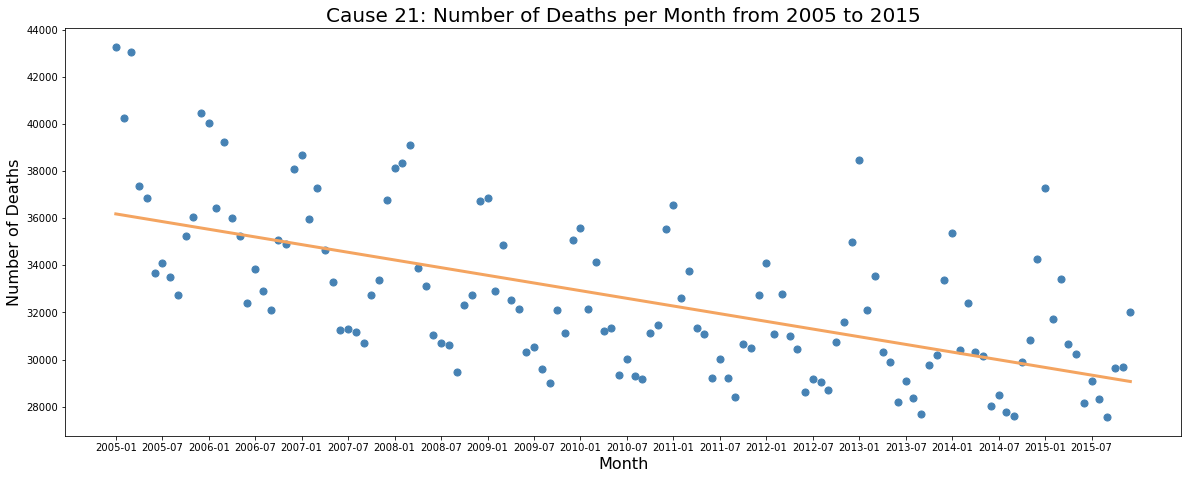

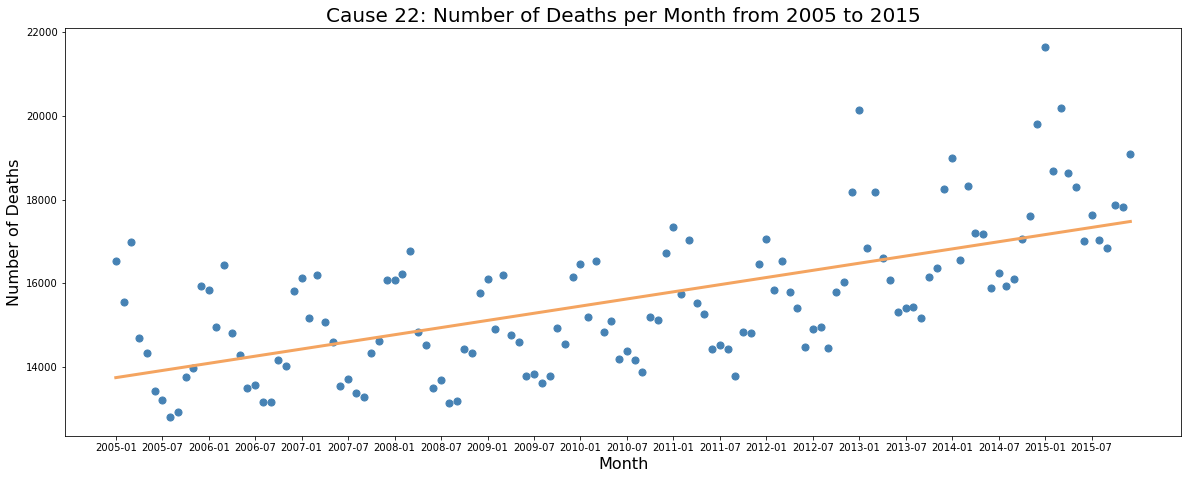

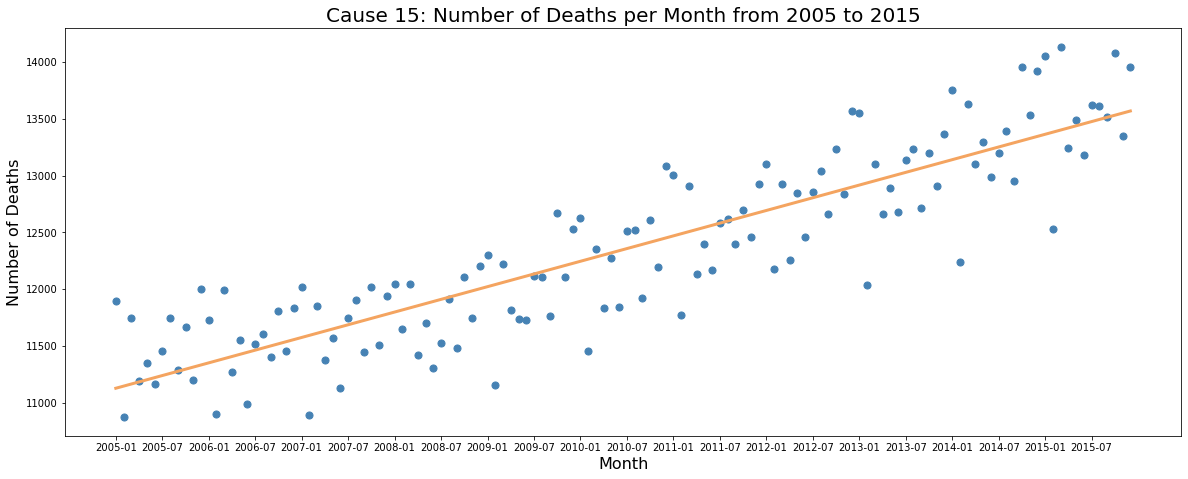

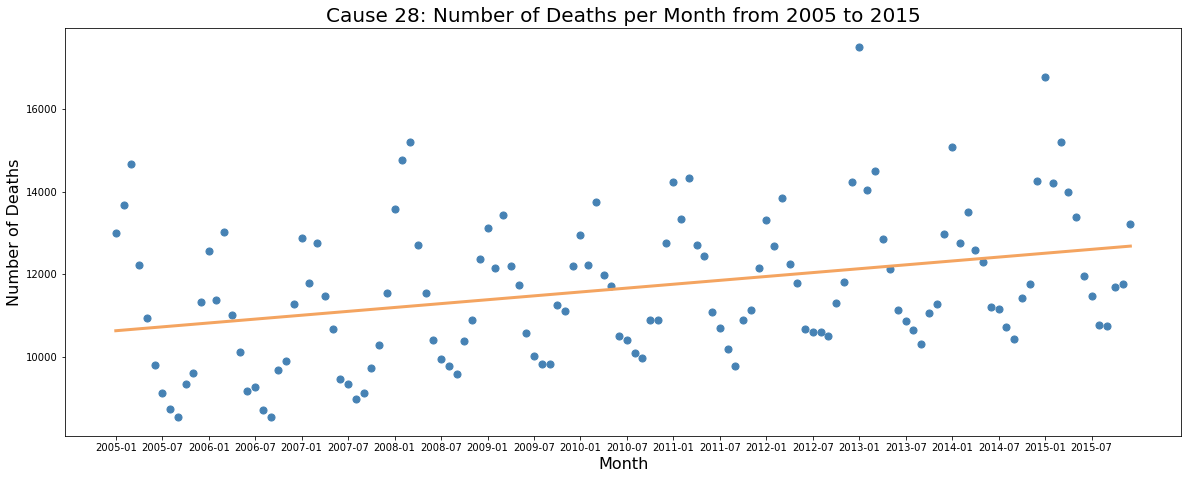

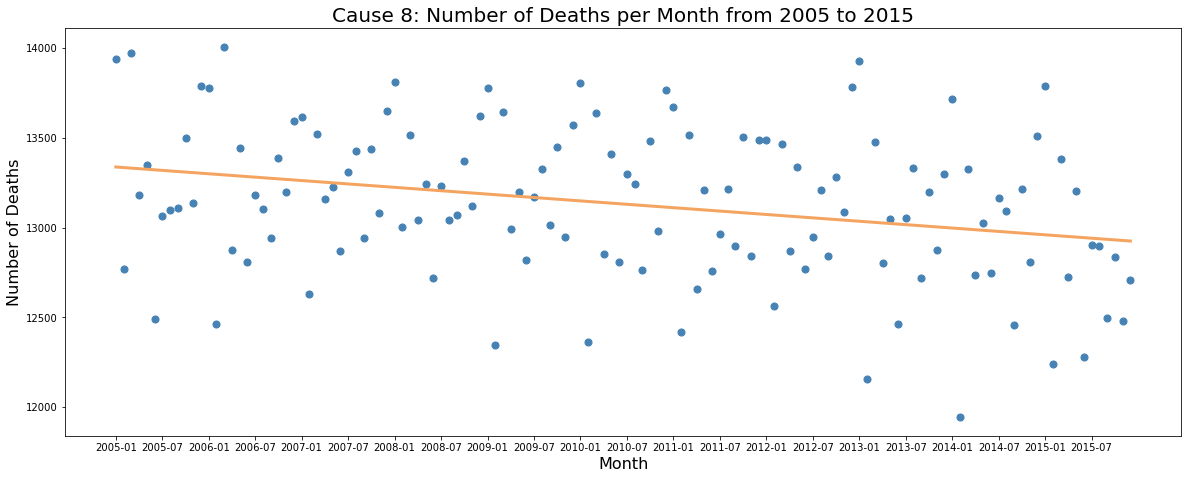

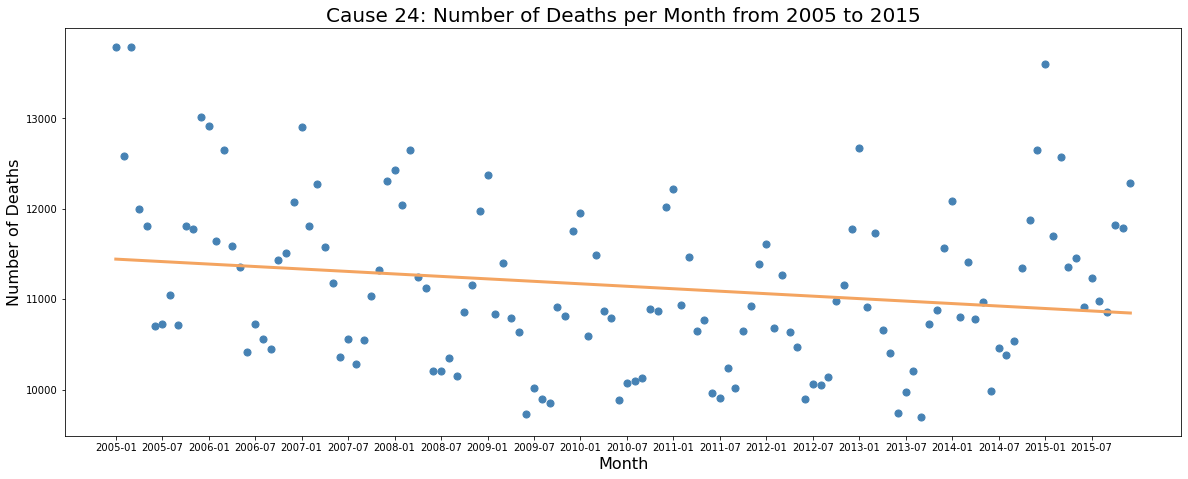

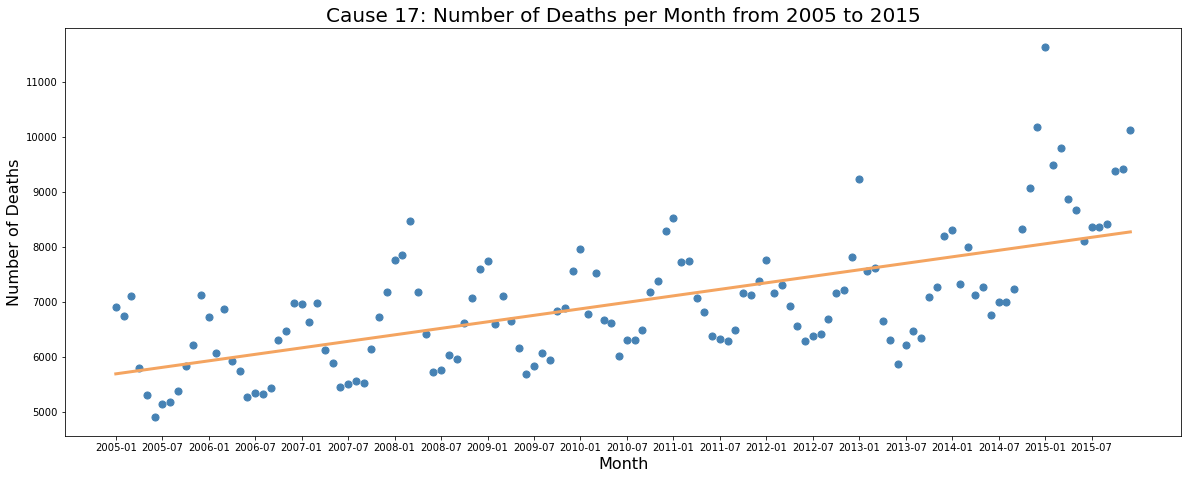

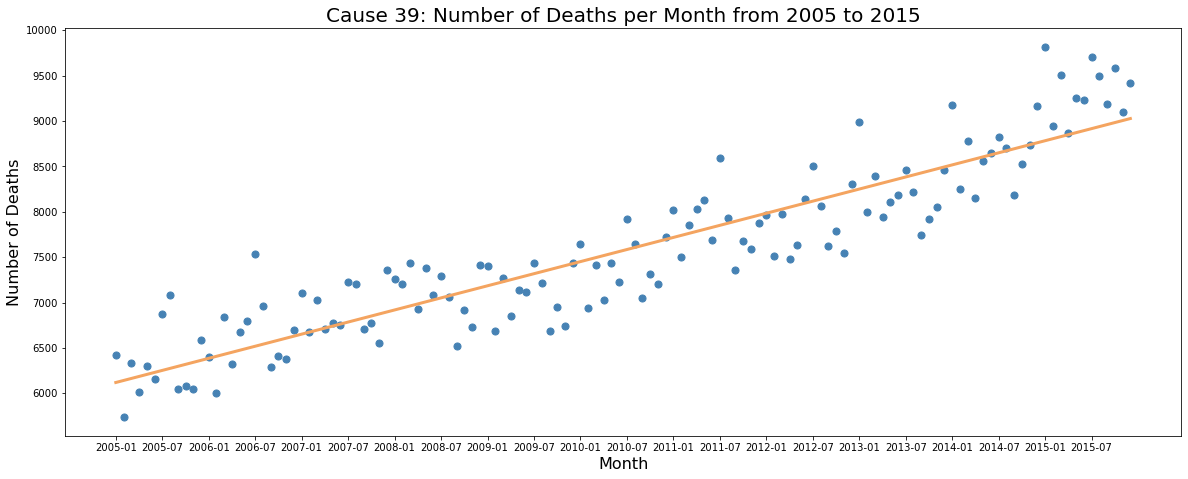

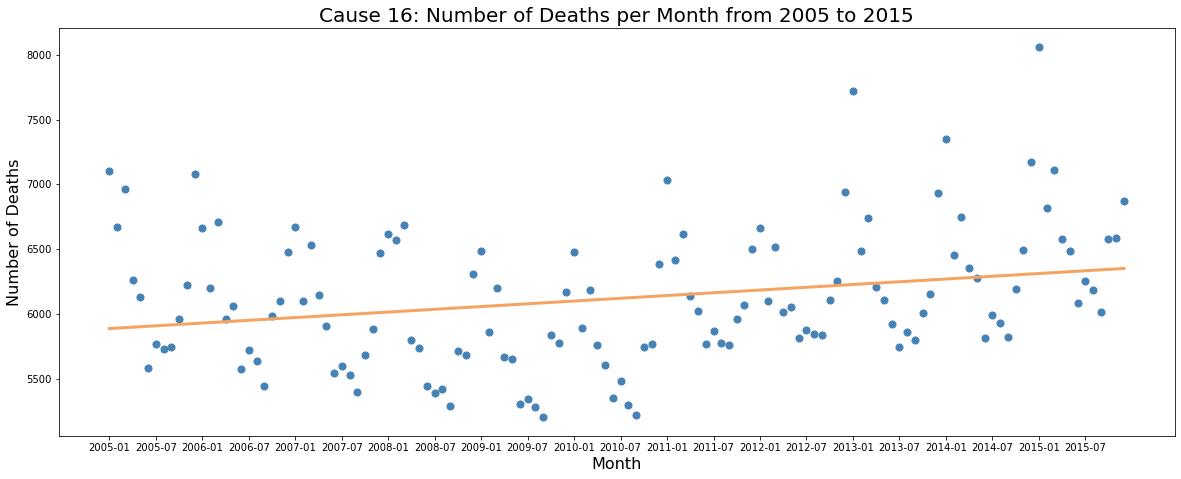

In [ ]:
for i in dcm["39_cause_recode"]:
    trend(dcm,i)
    print("\n")

In [ ]:
lr_df_t

,39_cause_recode,coefficients_year,intercept,R2
index,,,,
43.0,43,169.97,198872,0.190729
37.0,37,102.352,30194.9,0.626851
21.0,21,-54.3199,36182.9,0.376519
22.0,22,28.4702,13747.5,0.412185
15.0,15,18.6156,11129.2,0.778659
28.0,28,15.6418,10632.5,0.119261
8.0,8,-3.14927,13338.5,0.0820739
24.0,24,-4.54889,11445.3,0.0375139
17.0,17,19.7075,5688.44,0.419852


In [ ]:
lr_df_t[lr_df_t['coefficients_year']>0]

,39_cause_recode,coefficients_year,intercept,R2
index,,,,
43.0,43,169.97,198872,0.190729
37.0,37,102.352,30194.9,0.626851
22.0,22,28.4702,13747.5,0.412185
15.0,15,18.6156,11129.2,0.778659
28.0,28,15.6418,10632.5,0.119261
17.0,17,19.7075,5688.44,0.419852
39.0,39,22.1969,6120.07,0.837098
16.0,16,3.54276,5885.91,0.0663966


In [ ]:
lr_df_t[lr_df_t['coefficients_year']<0]

,39_cause_recode,coefficients_year,intercept,R2
index,,,,
21.0,21,-54.3199,36182.9,0.376519
8.0,8,-3.14927,13338.5,0.0820739
24.0,24,-4.54889,11445.3,0.0375139


After the first attempt, the result shows that the number of death is significantly related to time, but the R2 performs not so well. Therefore, change the time data to year and month, and change month to dummy variables to better fit the model and see if different months have different influence to the number of death.

In [ ]:
#build a dataframe to contain coefficients, intercept, and R2 of each cause
lr_df = pd.DataFrame(columns=['index','39_cause_recode', 'coefficients_year', 'coefficients_month2', 
                              'coefficients_month3','coefficients_month4', 'coefficients_month5', 'coefficients_month6', 
                              'coefficients_month7', 'coefficients_month8', 'coefficients_month9', 
                              'coefficients_month10', 'coefficients_month11', 'coefficients_month12', 'intercept', 'R2'])
coef_list = lr_df.columns.values.tolist()[2:-2]
lr_df['index'] = dcm['39_cause_recode']
lr_df = lr_df.set_index(['index'],drop = True)

In [ ]:
def month_trend(data,cause):
    
    lr_df.loc[cause,"39_cause_recode"] = cause #input cause to lr_df
    
    cause_data = data[data["39_cause_recode"] == cause]
    cause_data = cause_data.drop(axis=1,columns=["39_cause_recode"], inplace=False)
    column = cause_data.columns.values.tolist()
    value = cause_data.values.tolist()[0]
    dict_month = {'month':column,'data':value}
    df_month = pd.DataFrame(dict_month)
    df_month["year"] = df_month["month"].apply(lambda x: x.split('-')[0])
    df_month["month"] = df_month["month"].apply(lambda x: x.split('-')[-1])

    just_dummies = pd.get_dummies(df_month["month"],prefix="month")
    df_month = pd.concat([df_month, just_dummies], axis=1)
    df_month.drop(['month'], inplace=True, axis=1)
    df_month.drop(['month_01'], inplace=True, axis=1)
    #drop one month dummy to avoid multicollinearity problems
    df_month["year"] = (np.array(df_month["year"],'float32') - 2005) / 10
    #change year to between 0 and 1

    X = np.array(df_month.drop(['data'], inplace=False, axis=1),'float32')
    X = sm.add_constant(X)
    Y = np.array(pd.DataFrame(df_month["data"]).fillna(0),'float32')

    model = sm.OLS(Y, X).fit()
    print(model.summary())
    
    #add to lr_df
    for i in range(len(coef_list)):
        lr_df.loc[cause,coef_list[i]] = model.params[i+1]
    
    lr_df.loc[cause,'intercept'] = model.params[0]
    lr_df.loc[cause,'R2'] = model.rsquared

    month_new = []
    for i in range(0,len(column),6):
        month_new.append(column[i])
    
    predicted = model.predict(X.astype(float))
    
    plt.figure(figsize=[20, 7.5])
    mon = plt.scatter(column, Y, marker='x',color='steelblue',s=50)
    plt.plot(column, predicted,color='lightcoral',linewidth=3)
    plt.title('Cause %d: Number of Deaths per Month from 2005 to 2015'%cause, fontsize=20)
    plt.ylabel('Number of Deaths', fontsize=16)
    plt.xlabel('Month', fontsize=16)
    plt.xticks(list(range(0,len(month),6)), month_new)
    mon.get_figure().savefig('month_cause%i'%cause,dpi=400)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     66.79
Date:                Wed, 16 Dec 2020   Prob (F-statistic):           5.48e-47
Time:                        07:11:50   Log-Likelihood:                -1320.1
No. Observations:                 132   AIC:                             2666.
Df Residuals:                     119   BIC:                             2704.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.229e+05   1861.223    119.766      0.0



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     209.5
Date:                Wed, 16 Dec 2020   Prob (F-statistic):           5.96e-74
Time:                        07:11:55   Log-Likelihood:                -865.91
No. Observations:                 132   AIC:                             1758.
Df Residuals:                     119   BIC:                             1795.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.163e+04     59.648    194.933      0



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     38.05
Date:                Wed, 16 Dec 2020   Prob (F-statistic):           4.70e-35
Time:                        07:12:00   Log-Likelihood:                -1014.6
No. Observations:                 132   AIC:                             2055.
Df Residuals:                     119   BIC:                             2093.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6933.3106    183.935     37.694      0

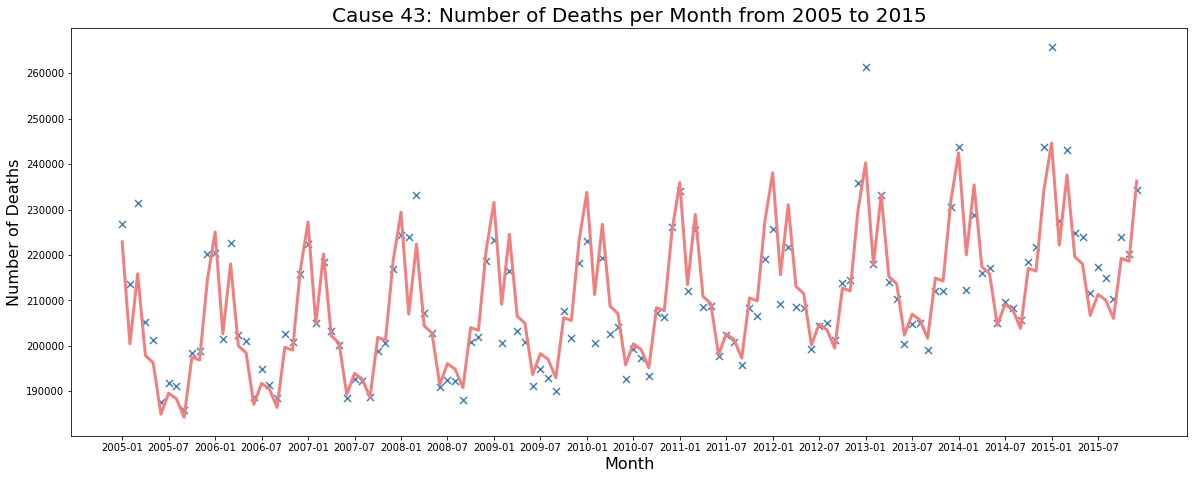

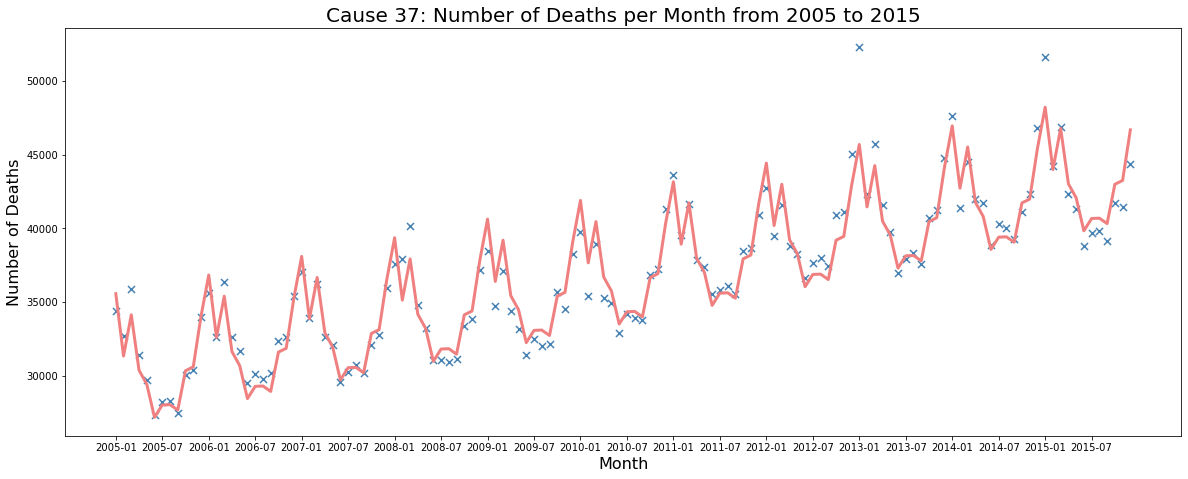

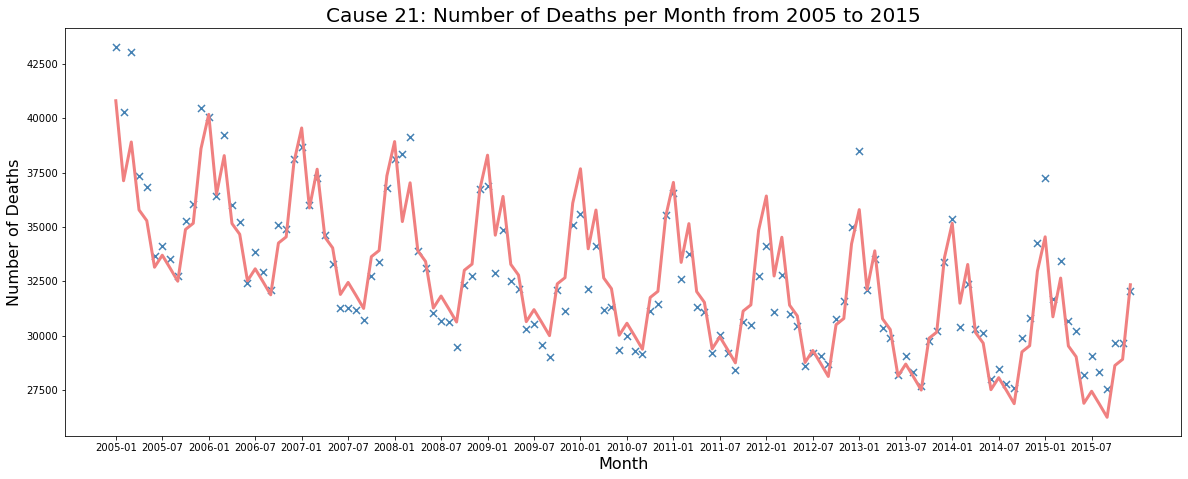

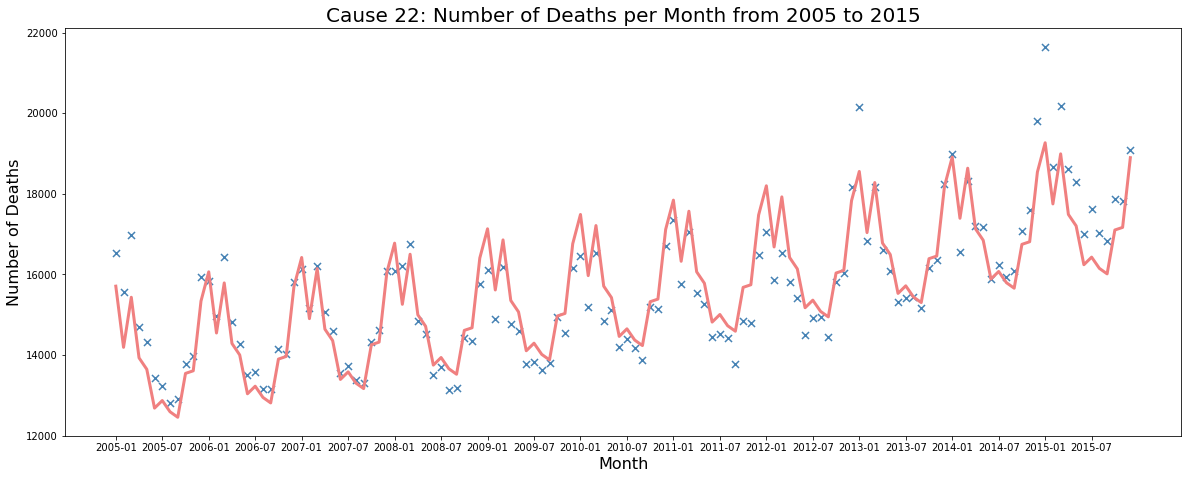

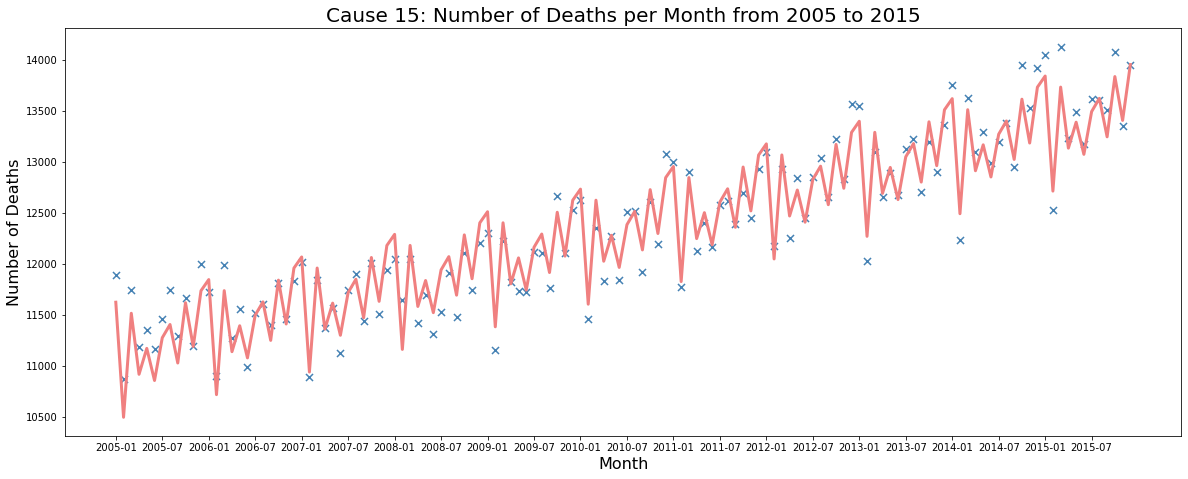

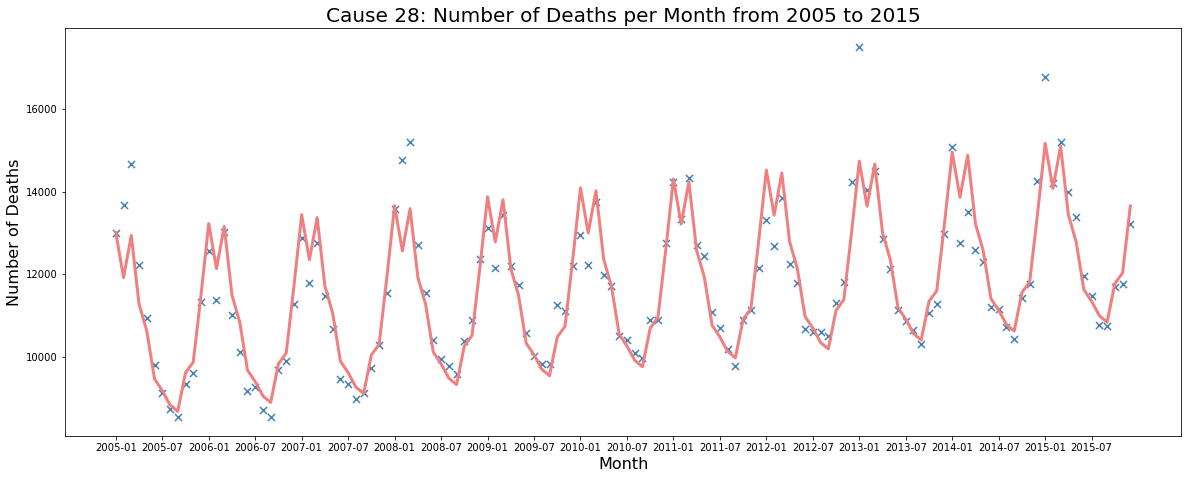

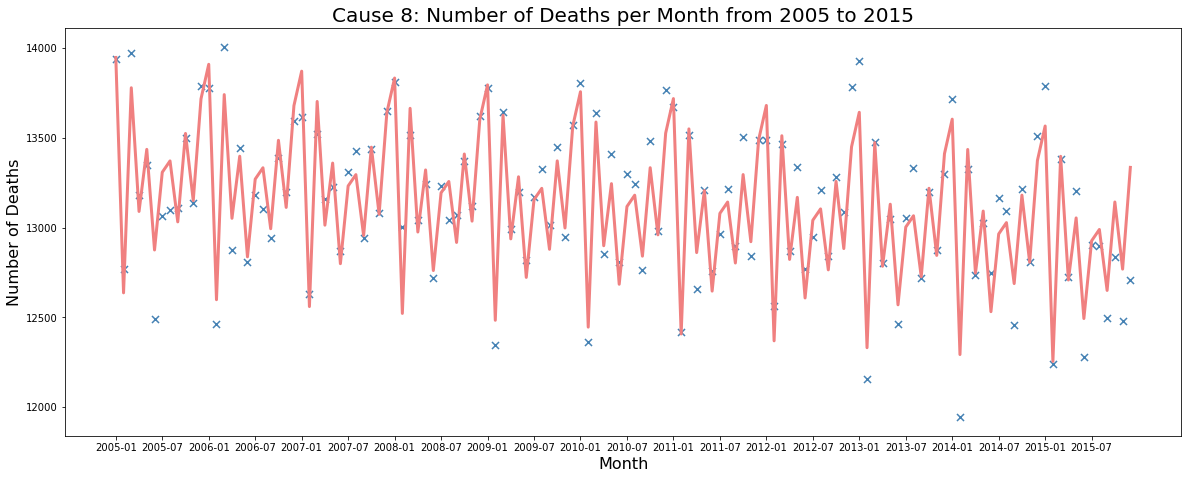

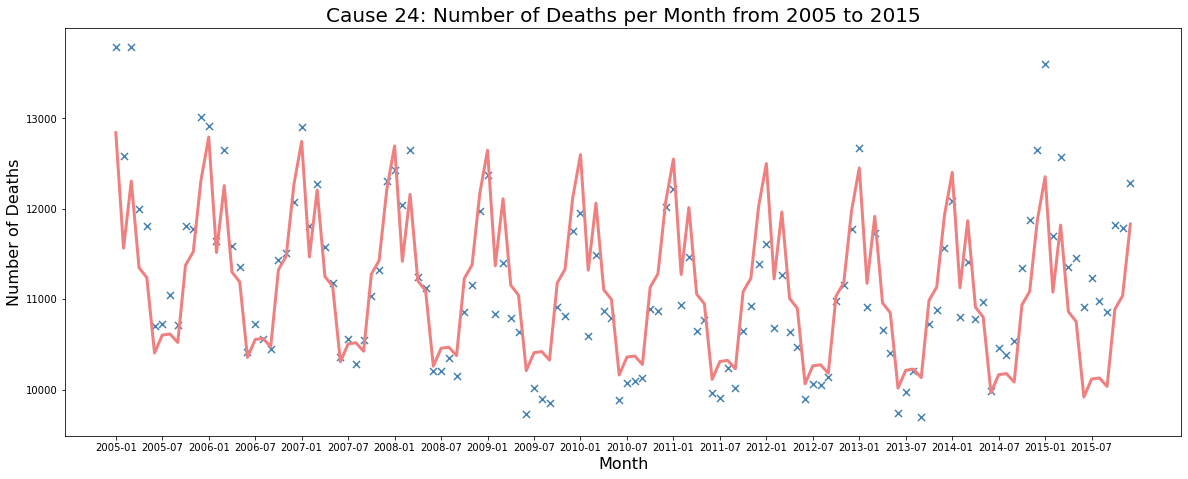

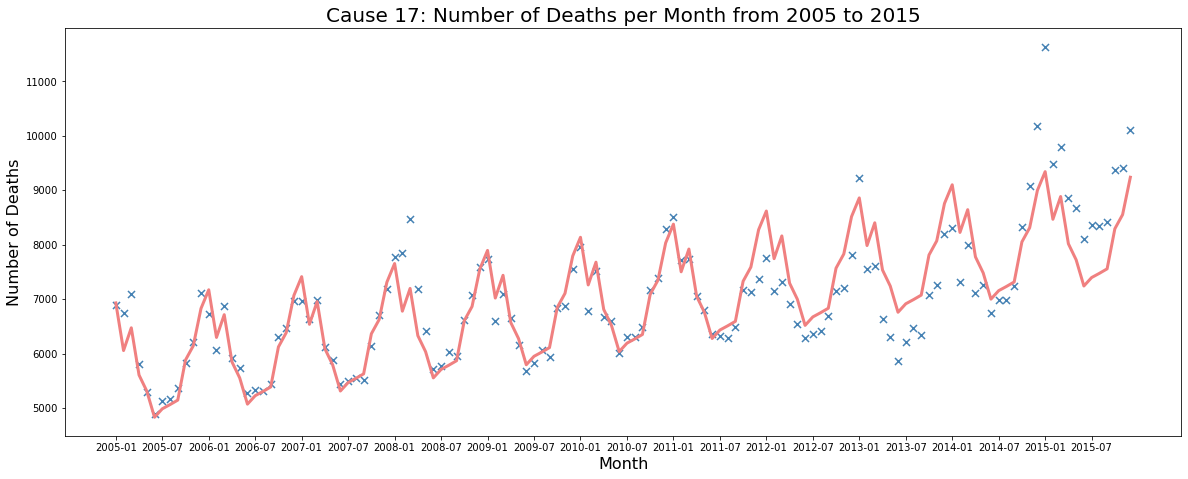

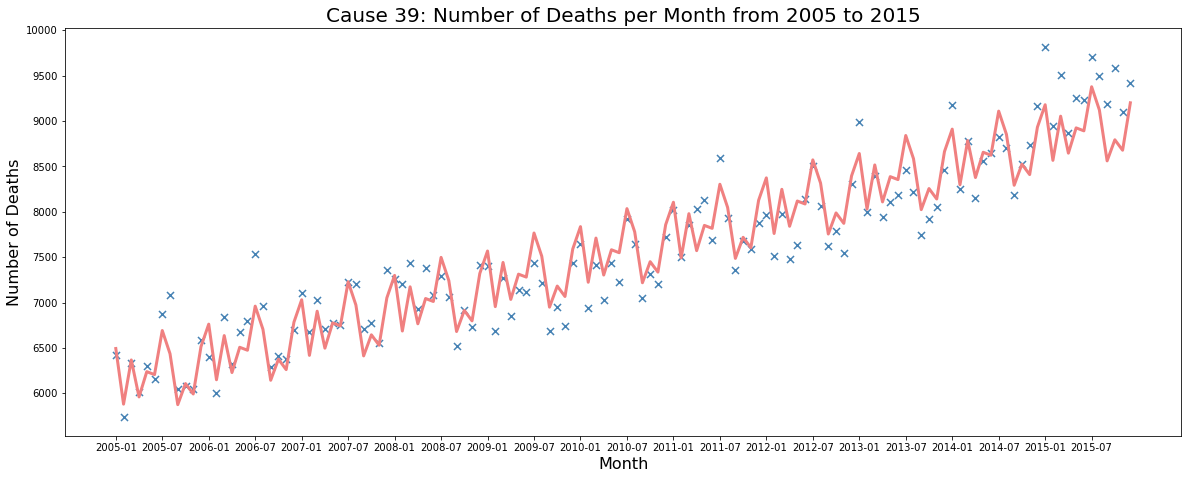

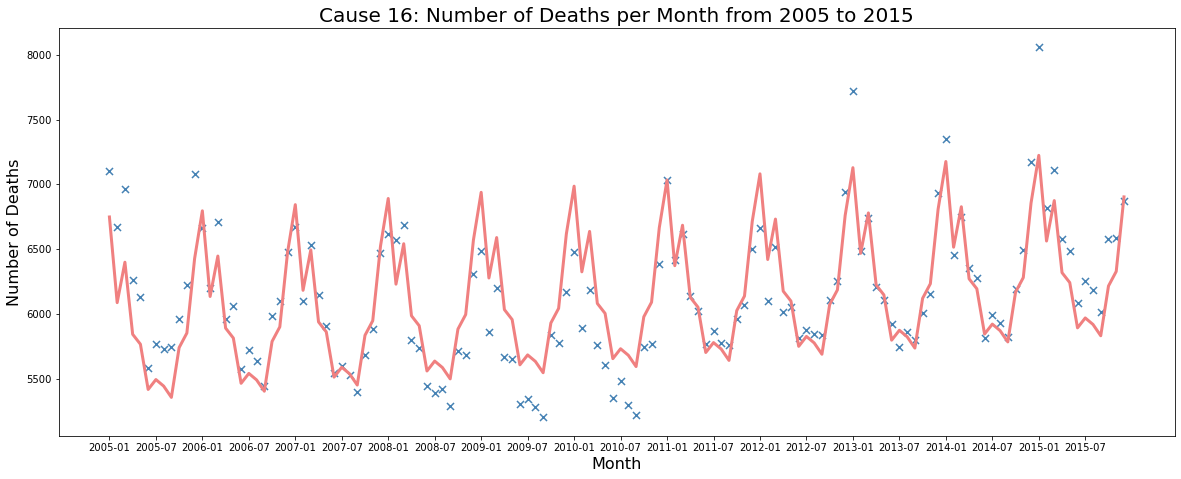

In [ ]:
for i in dcm["39_cause_recode"]:
    month_trend(dcm,i)
    print("\n")

In [ ]:
lr_df

,39_cause_recode,coefficients_year,coefficients_month2,coefficients_month3,coefficients_month4,coefficients_month5,coefficients_month6,coefficients_month7,coefficients_month8,coefficients_month9,coefficients_month10,coefficients_month11,coefficients_month12,intercept,R2
index,,,,,,,,,,,,,,,
43.0,43,21744.7,-22448.7,-7029.18,-25045.1,-26613.6,-37938.5,-33311,-34568.2,-38618.5,-25385.5,-26012.6,-8365.91,222911,0.870727
37.0,37,12615.7,-4219.82,-1429.64,-5181.45,-6127.82,-8360.82,-7530.73,-7507,-7874.27,-5215.36,-4955.27,-1535.18,35585.9,0.944282
21.0,21,-6251.95,-3675.73,-1895.09,-5015.91,-5509.73,-7648,-7096.82,-7684.55,-8290.82,-5912.82,-5628.91,-2201.82,40797.6,0.893786
22.0,22,3558.89,-1517.91,-275.182,-1778.55,-2062.91,-3026.73,-2838.55,-3116.91,-3253.55,-2165.09,-2100.27,-369.727,15708.3,0.862309
15.0,15,2218.06,-1128.27,-108.364,-706.909,-452.636,-767.727,-348.545,-218.727,-596.091,-5.09091,-435.091,112.727,11627.4,0.954812
28.0,28,2160.1,-1092.73,-71.1818,-1731.55,-2384.36,-3547.27,-3826.36,-4175.36,-4331.55,-3397.36,-3139.73,-1517.82,13011.6,0.880663
8.0,8,-381.939,-1311.55,-168.818,-858,-512.091,-1072.64,-639.636,-576.545,-916.091,-423.364,-797.364,-230.545,13948.7,0.867188
24.0,24,-486.341,-1276.45,-535.818,-1492,-1600.91,-2435.27,-2237.27,-2225.18,-2318.64,-1465.45,-1317,-524,12842.8,0.738581
17.0,17,2410.11,-874.727,-457,-1324,-1618.45,-2099.64,-1944.18,-1867.09,-1784.45,-1048.36,-788.727,-102.364,6933.31,0.793272


Most month dummy variables are significant, which means month can influence the number of death. I want to dive deeper to figure out whether there is a seasonal trend. Here I only focus on significance, so I don't care about R2.

In [ ]:
#build a dataframe to contain coefficients, intercept, and R2 of each cause
lr_df_s = pd.DataFrame(columns=['index','39_cause_recode', 'coefficients_year', 'coefficients_fall', 
                              'coefficients_spring', 'coefficients_winter', 'intercept', 'R2'])
coef_list = lr_df_s.columns.values.tolist()[2:-2]
lr_df_s['index'] = dcm['39_cause_recode']
lr_df_s = lr_df_s.set_index(['index'],drop = True)

In [ ]:
def get_season(i):
    i = int(i)
    if i in (1,2,3):
        return "winter"
    if i in (4,5,6):
        return "spring"
    if i in (7,8, 9):
        return "summer"
    if i in (10,11, 12):
        return "fall"

In [ ]:
def season_trend(data,cause):
    
    lr_df_s.loc[cause,"39_cause_recode"] = cause #input cause to lr_df_s
    
    cause_data = data[data["39_cause_recode"] == cause]
    cause_data = cause_data.drop(axis=1,columns=["39_cause_recode"], inplace=False)
    column = cause_data.columns.values.tolist()
    value = cause_data.values.tolist()[0]
    df_season = {'month':column,'data':value}
    df_season = pd.DataFrame(df_season)
    df_season["year"] = df_season["month"].apply(lambda x: x.split('-')[0])
    df_season["month"] = df_season["month"].apply(lambda x: x.split('-')[-1])
    df_season["season"] = df_season["month"].apply(lambda x: get_season(x))
    #1,2,3 as winter, 4,5,6 as spring, 7,8,9 as summer, 10,11,12 as winter, which is slightly different from normal seasons 
    seasons = ['winter', 'spring','summer','fall']
    df_season['season'] = df_season['season'].astype('category')
    df_season['season'].cat.set_categories(seasons, inplace=True)
    #set category to sort seasons in the appropriate way('winter', 'spring','summer','fall')
    #calculate seasonal number of death
    df_season = pd.DataFrame(df_season.groupby(['year','season'])['data'].sum())
    df_season.reset_index(inplace=True)
    df_season.sort_values(['year','season'], ascending=True)
    season = list(df_season['year'] + '-'+ df_season['season'].astype('string'))

    dummies = pd.get_dummies(df_season["season"],prefix="season")
    df_season = pd.concat([df_season, dummies], axis=1)
    df_season.drop(['season','season_summer'], inplace=True, axis=1)
    #drop one season dummy to avoid multicollinearity problems

    df_season["year"] = (np.array(df_season["year"],'float32') - 2005) / 10
    #change year to between 0 and 1

    Xs = np.array(df_season.drop(['data'], inplace=False, axis=1),'float32')
    Xs = sm.add_constant(Xs)
    Ys = np.array(pd.DataFrame(df_season["data"]).fillna(0),'float32')

    model = sm.OLS(Ys, Xs).fit()
    print(model.summary())
    
    #add to lr_df_s
    for i in range(len(coef_list)):
        lr_df_s.loc[cause,coef_list[i]] = model.params[i+1]
    
    lr_df_s.loc[cause,'intercept'] = model.params[0]
    lr_df_s.loc[cause,'R2'] = model.rsquared

    season_new = []
    for i in range(0,len(season),3):
        season_new.append(season[i])
    
    predicted = model.predict(Xs.astype(float))
    plt.figure(figsize=[20, 7.5])
    sea = plt.scatter(season, Ys, marker='o',color='skyblue',s=70)
    plt.plot(season, predicted,color='salmon',linewidth=3)
    plt.title('Cause %d: Number of Deaths per Season from 2005 to 2015'%cause, fontsize=20)
    plt.ylabel('Number of Deaths', fontsize=16)
    plt.xlabel('Month', fontsize=16)
    plt.xticks(list(range(0,len(season),3)), season_new)
    sea.get_figure().savefig('season_cause%i'%cause,dpi=400)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     70.29
Date:                Wed, 16 Dec 2020   Prob (F-statistic):           2.69e-17
Time:                        08:21:23   Log-Likelihood:                -480.48
No. Observations:                  44   AIC:                             971.0
Df Residuals:                      39   BIC:                             979.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.622e+05   5460.040    102.973      0.0



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     298.7
Date:                Wed, 16 Dec 2020   Prob (F-statistic):           1.11e-28
Time:                        08:21:28   Log-Likelihood:                -325.36
No. Observations:                  44   AIC:                             660.7
Df Residuals:                      39   BIC:                             669.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.372e+04    160.742    209.771      0



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     39.74
Date:                Wed, 16 Dec 2020   Prob (F-statistic):           2.92e-13
Time:                        08:21:32   Log-Likelihood:                -383.07
No. Observations:                  44   AIC:                             776.1
Df Residuals:                      39   BIC:                             785.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.52e+04    596.619     25.484      0

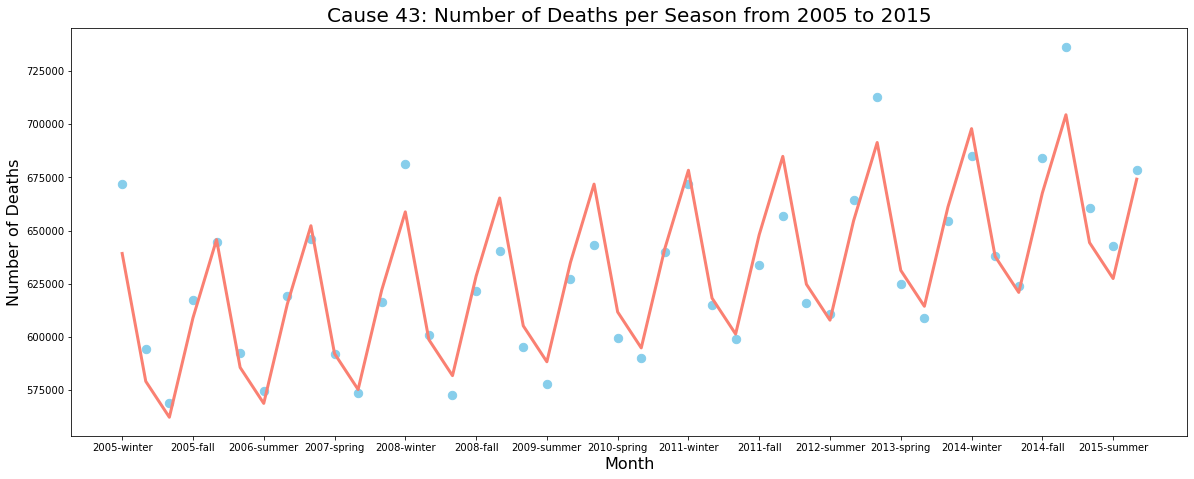

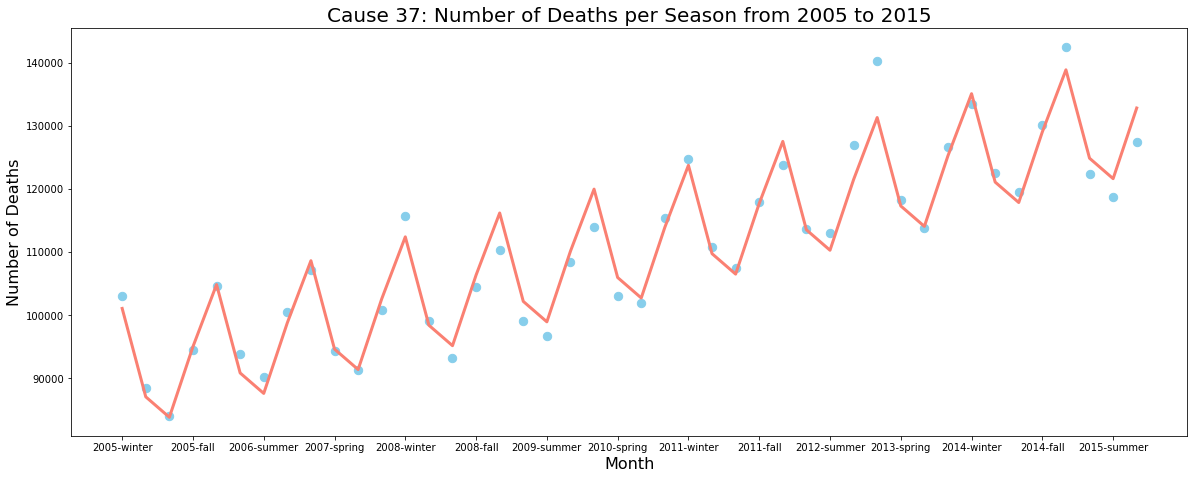

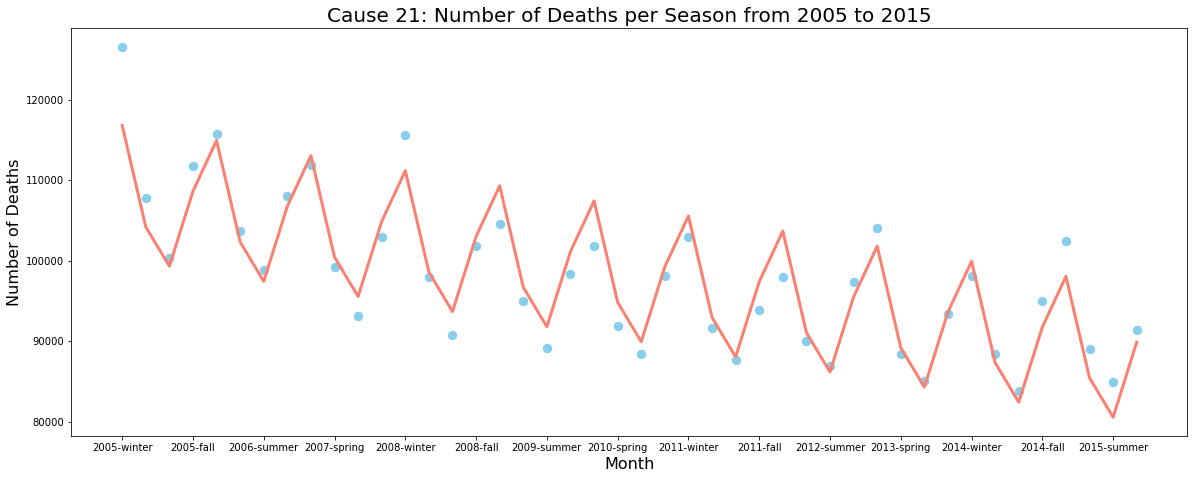

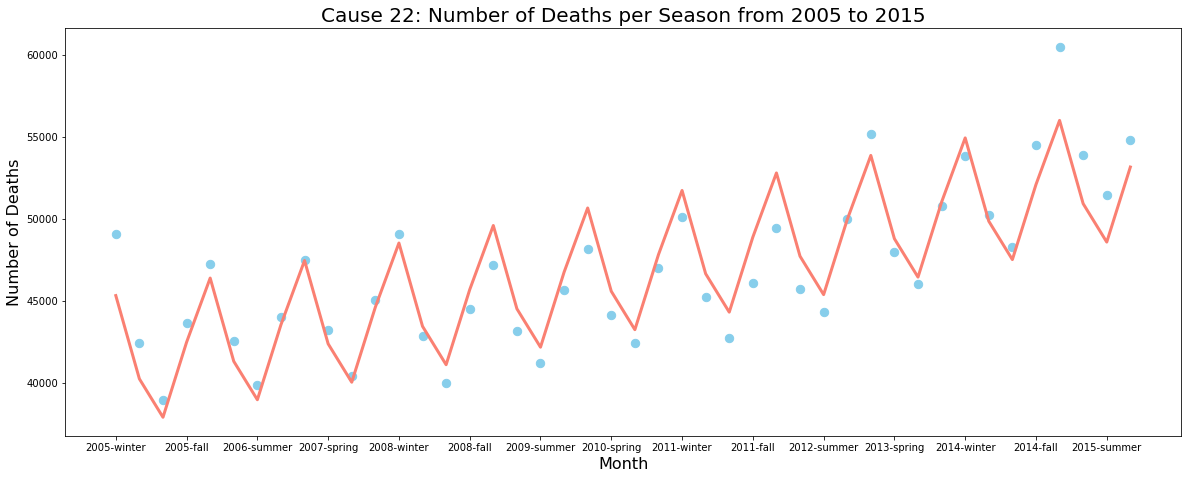

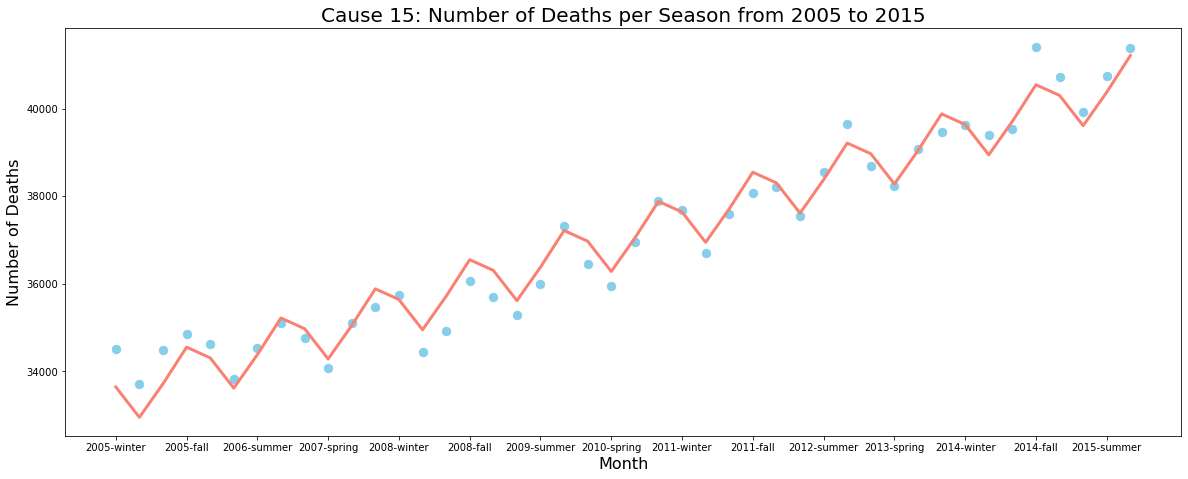

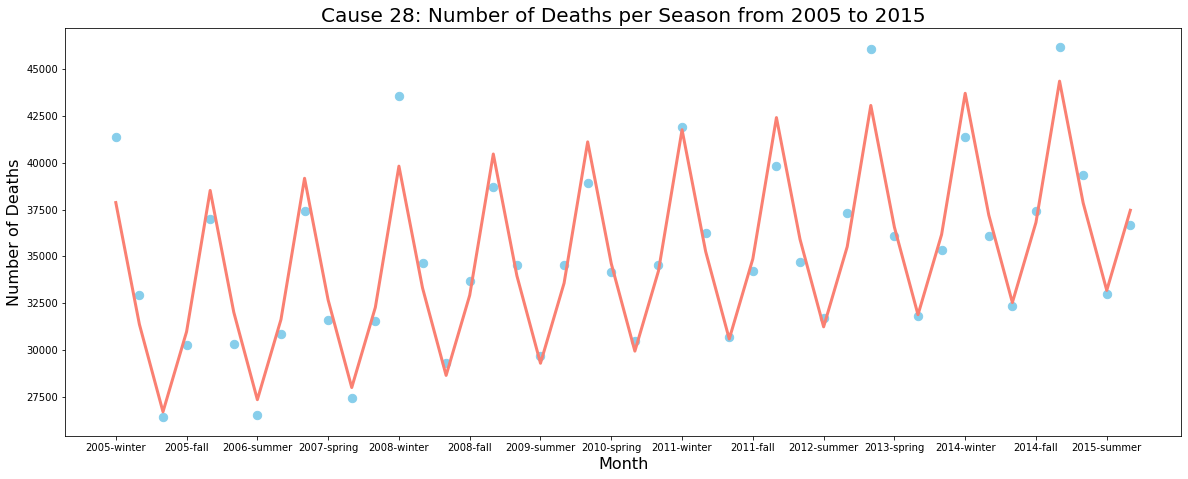

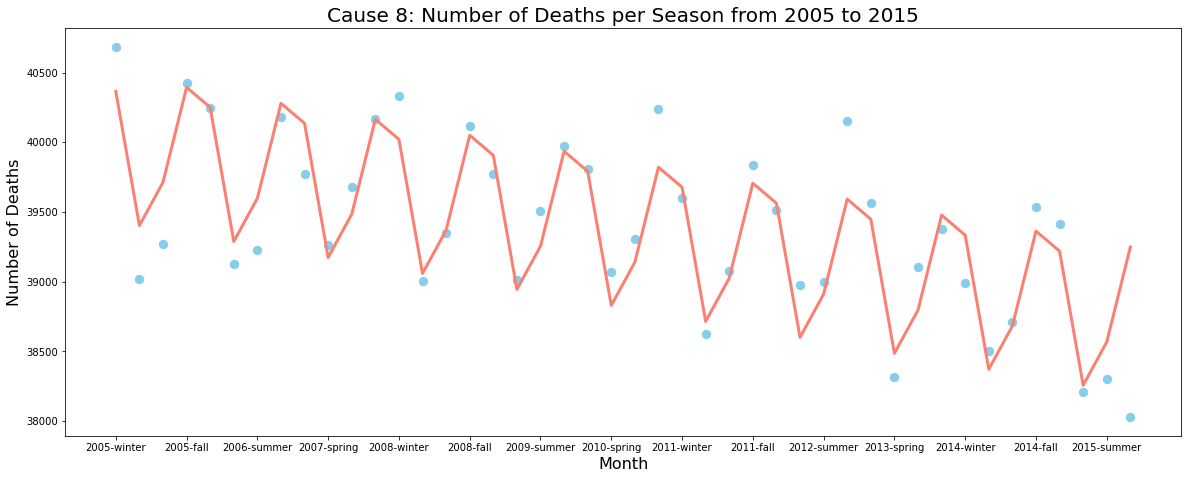

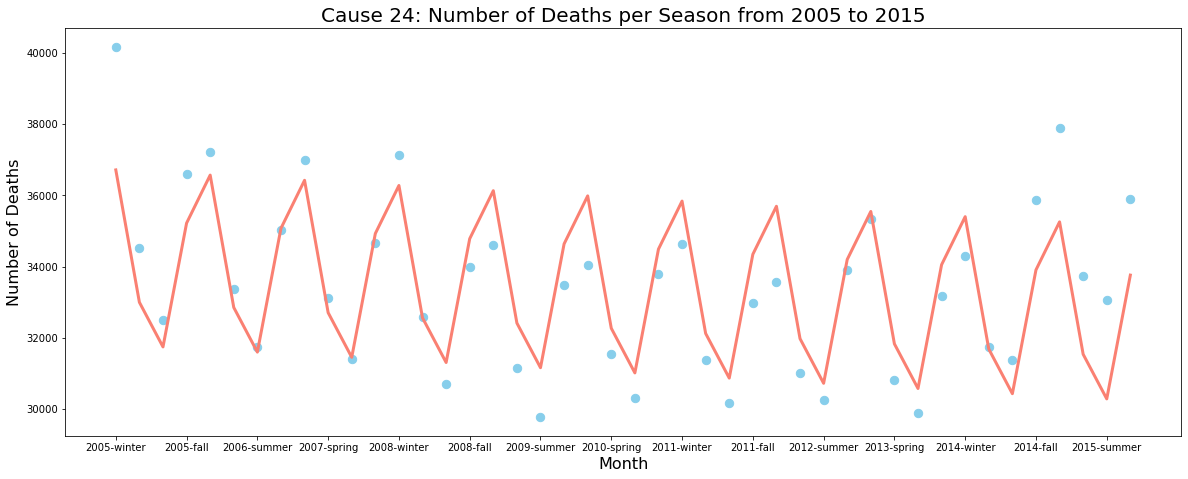

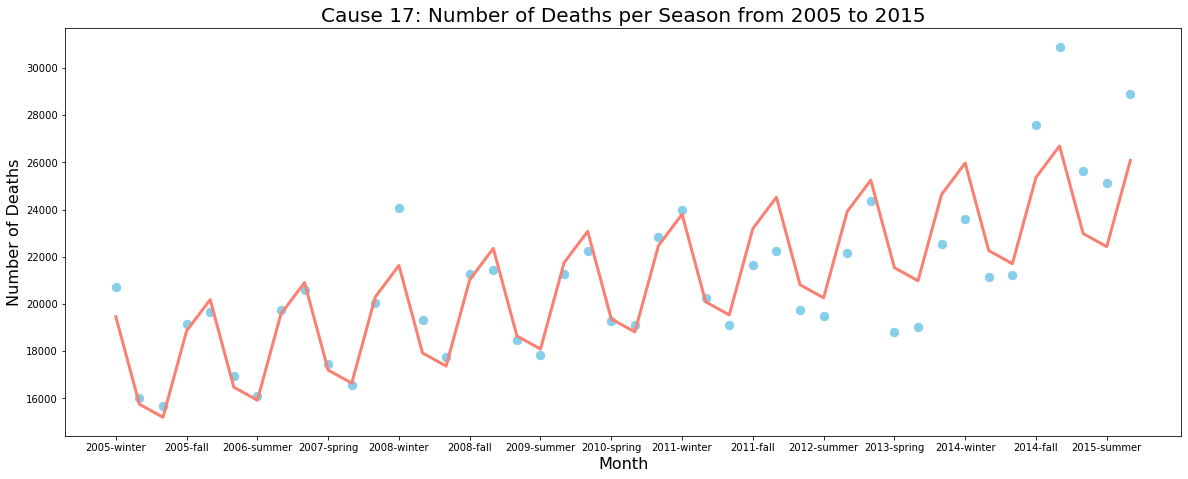

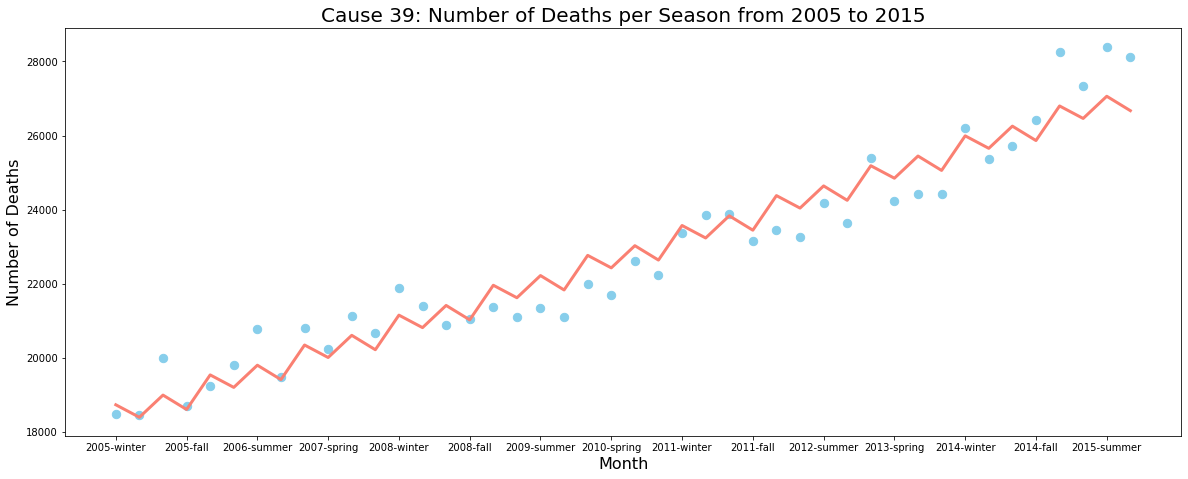

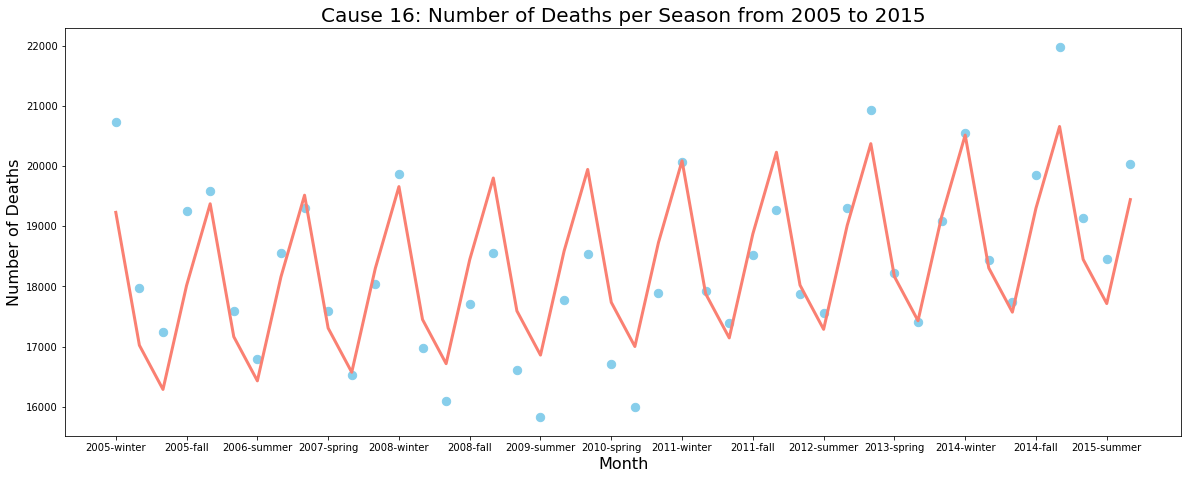

In [ ]:
for i in dcm["39_cause_recode"]:
    season_trend(dcm,i)
    print("\n")

In [ ]:
lr_df_s

,39_cause_recode,coefficients_year,coefficients_fall,coefficients_spring,coefficients_winter,intercept,R2
index,,,,,,,
43.0,43,65234.1,77019.8,16900.5,46733.6,562235,0.878184
37.0,37,37847.1,17262.5,3241.91,11206.2,83845.6,0.959264
21.0,21,-18755.8,17501.4,4898.55,9328.64,99320.6,0.896793
22.0,22,10676.7,7415.91,2340.82,4573.91,37915.9,0.865039
15.0,15,6654.18,-73.2727,-763.909,835.909,33718.9,0.968392
28.0,28,6480.3,11169.4,4670.09,4278.36,26701.5,0.907703
8.0,8,-1145.82,651.909,-310.455,681,39713.8,0.789433
24.0,24,-1459.02,4968.82,1252.91,3474.64,31747.3,0.69772
17.0,17,7230.32,4264,553.636,3656.27,15204.2,0.802971
